# Binary classification example: classifying movie reviews

Work with the IMDB dataset, trying to classify positive and negative reviews.

In [16]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)
import numpy as np
from tensorflow.python.keras import models, layers, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2.0.0


## Loadig the dataset

In [0]:
from tensorflow.python.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

`train_data` and `test_data` are list of reviews

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Decoding reviews

In [0]:
offset = 3
word_to_id = imdb.get_word_index()
word_to_id = {k:v+offset for k, v in word_to_id.items()}
word_to_id['<PAD>'] = 0
word_to_id['<START>'] = 1
word_to_id['<UNK>'] = 2

id_to_word = {v:k for k, v in word_to_id.items()}

In [5]:
decoded_first_review = ' '.join([id_to_word[word_id] for word_id in train_data[0]])
print(decoded_first_review)

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

## Endcoding the data into a binary matrix

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [0]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.array(train_labels.astype('float32'))
y_test = np.array(test_labels.astype('float32'))

## Defining the model

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Defining validation data

In [0]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training the model

In [11]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 220us/sample - loss: 0.5891 - accuracy: 0.6869 - val_loss: 0.4951 - val_accuracy: 0.8570
Epoch 2/20
15000/15000 [==============================] - 2s 128us/sample - loss: 0.3623 - accuracy: 0.8914 - val_loss: 0.3216 - val_accuracy: 0.8866
Epoch 3/20
15000/15000 [==============================] - 2s 128us/sample - loss: 0.2433 - accuracy: 0.9216 - val_loss: 0.2892 - val_accuracy: 0.8894
Epoch 4/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.1848 - accuracy: 0.9436 - val_loss: 0.2776 - val_accuracy: 0.8891
Epoch 5/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.1527 - accuracy: 0.9519 - val_loss: 0.2809 - val_accuracy: 0.8875
Epoch 6/20
15000/15000 [==============================] - 2s 131us/sample - loss: 0.1279 - accuracy: 0.9597 - val_loss: 0.3388 - val_accuracy: 0.8721
Epoch 7/20
15000/15000 [==========================

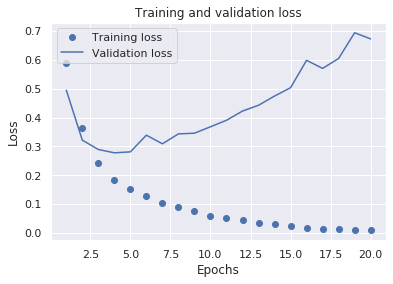

In [12]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, 21)

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

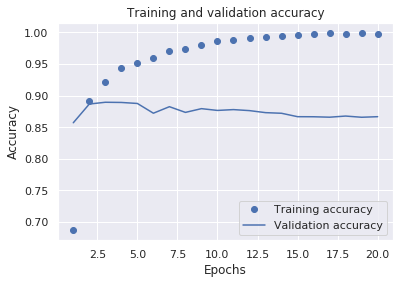

In [13]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.figure()
plt.title('Training and validation accuracy')
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Comments**: case of *overfitting*, we could stop the training after 4 epochs.

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)
print(results)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 141us/sample - loss: 0.3881 - accuracy: 0.8309
Epoch 2/4
25000/25000 [==============================] - 3s 118us/sample - loss: 0.2158 - accuracy: 0.9159
Epoch 3/4
25000/25000 [==============================] - 3s 106us/sample - loss: 0.1763 - accuracy: 0.9336
Epoch 4/4
25000/25000 [==============================] - 3s 107us/sample - loss: 0.1535 - accuracy: 0.9426
25000/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

**Comments**: around 85% of accuracy for this naive approach. State-of-the-art around 95%.

## Using word embedding

In [0]:
maxlen = 20
X_train = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

In [22]:
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(X_train, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 114us/sample - loss: 0.6758 - acc: 0.6032 - val_loss: 0.6373 - val_acc: 0.6812
Epoch 2/10
20000/20000 [==============================] - 2s 87us/sample - loss: 0.5595 - acc: 0.7455 - val_loss: 0.5379 - val_acc: 0.7280
Epoch 3/10
20000/20000 [============================